In [1]:
# WIP

In [2]:
# V 1.13
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

# Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [3]:
df = pd.read_csv(ZipFile('data/student-alcohol-consumption.zip').open('student-mat.csv'))
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [4]:
df.shape

(395, 33)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
new_columns = ['school', 'sex', 'age', 'address', 'familySize',
               'pStatus', 'mEdu', 'fEdu', 'mJob', 'fJob',
              'reason', 'guardian', 'travelTime', 'studyTime', 'failures',
              'schoolSupport', 'familySupport', 'paid', 'activities', 'nursery',
              'higher', 'internet', 'romantic', 'familyRelationship', 'freeTime',
              'goOut', 'dAlc', 'wAlc', 'health', 'absences', 'g1', 'g2', 'g3']
df.columns = new_columns
df.head()

,school,sex,age,address,familySize,pStatus,mEdu,fEdu,mJob,fJob,reason,guardian,travelTime,studyTime,failures,schoolSupport,familySupport,paid,activities,nursery,higher,internet,romantic,familyRelationship,freeTime,goOut,dAlc,wAlc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [8]:
# Dropping age outliers 
df = df[df.age < 20]
# Anouther way
# df[~df.age.isin([20, 21, 22])]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 33 columns):
school                390 non-null object
sex                   390 non-null object
age                   390 non-null int64
address               390 non-null object
familySize            390 non-null object
pStatus               390 non-null object
mEdu                  390 non-null int64
fEdu                  390 non-null int64
mJob                  390 non-null object
fJob                  390 non-null object
reason                390 non-null object
guardian              390 non-null object
travelTime            390 non-null int64
studyTime             390 non-null int64
failures              390 non-null int64
schoolSupport         390 non-null object
familySupport         390 non-null object
paid                  390 non-null object
activities            390 non-null object
nursery               390 non-null object
higher                390 non-null object
internet           

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,390.00,16.65,1.20,15.00,16.00,17.00,18.00,19.00
mEdu,390.00,2.75,1.10,0.00,2.00,3.00,4.00,4.00
fEdu,390.00,2.53,1.09,0.00,2.00,3.00,3.00,4.00
travelTime,390.00,1.45,0.70,1.00,1.00,1.00,2.00,4.00
studyTime,390.00,2.04,0.84,1.00,1.00,2.00,2.00,4.00
failures,390.00,0.31,0.71,0.00,0.00,0.00,0.00,3.00
familyRelationship,390.00,3.93,0.89,1.00,4.00,4.00,5.00,5.00
freeTime,390.00,3.22,0.99,1.00,3.00,3.00,4.00,5.00
goOut,390.00,3.10,1.12,1.00,2.00,3.00,4.00,5.00
dAlc,390.00,1.46,0.86,1.00,1.00,1.00,2.00,5.00


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
school,390,2,GP,347
sex,390,2,F,207
address,390,2,U,303
familySize,390,2,GT3,277
pStatus,390,2,T,351
mJob,390,5,other,140
fJob,390,5,other,214
reason,390,4,course,141
guardian,390,3,mother,272
schoolSupport,390,2,no,339


In [12]:
df.isnull().sum()

school                0
sex                   0
age                   0
address               0
familySize            0
pStatus               0
mEdu                  0
fEdu                  0
mJob                  0
fJob                  0
reason                0
guardian              0
travelTime            0
studyTime             0
failures              0
schoolSupport         0
familySupport         0
paid                  0
activities            0
nursery               0
higher                0
internet              0
romantic              0
familyRelationship    0
freeTime              0
goOut                 0
dAlc                  0
wAlc                  0
health                0
absences              0
g1                    0
g2                    0
g3                    0
dtype: int64

In [13]:
# Finding numerical and categorical columns
numeric_cols = df._get_numeric_data().columns
categorical_cols = [x for x in df.columns if x not in numeric_cols]

In [14]:
numeric_cols

Index(['age', 'mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures',
       'familyRelationship', 'freeTime', 'goOut', 'dAlc', 'wAlc', 'health',
       'absences', 'g1', 'g2', 'g3'],
      dtype='object')

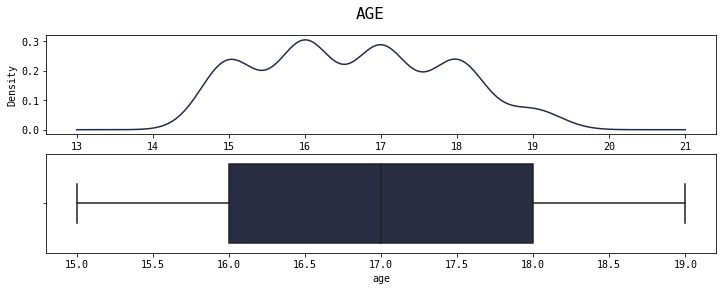

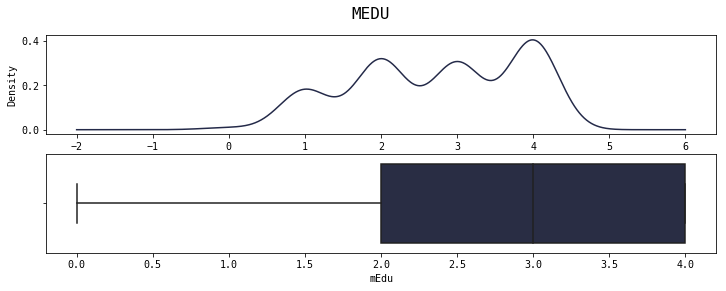

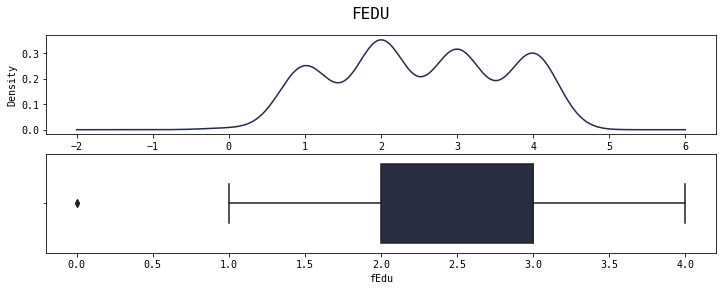

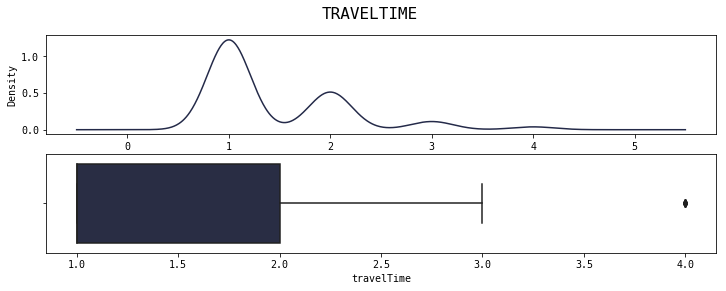

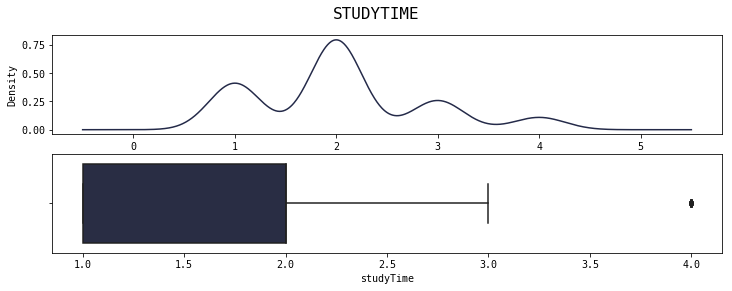

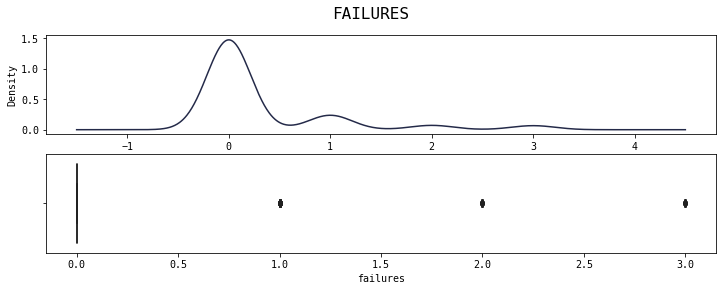

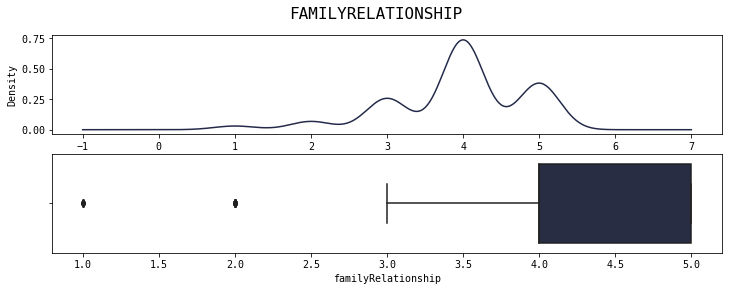

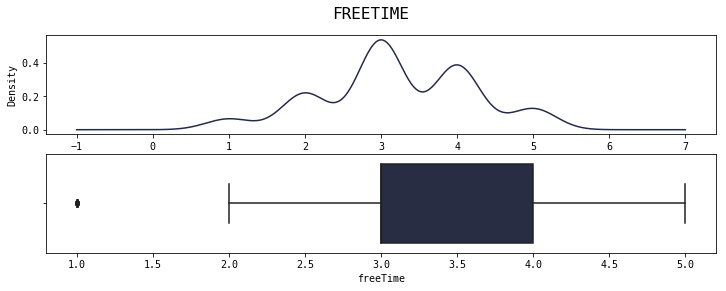

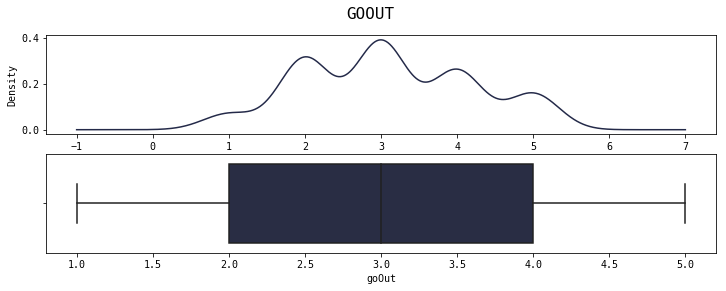

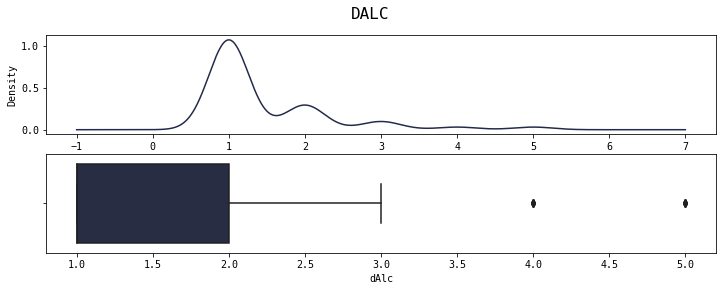

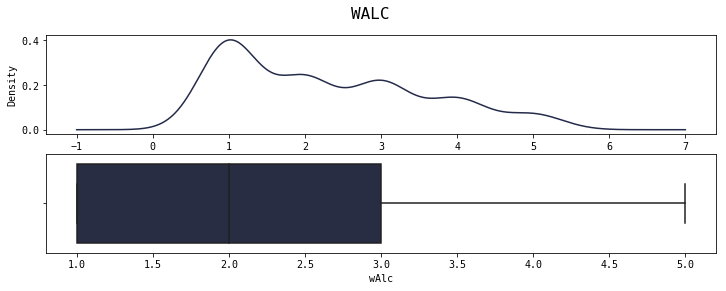

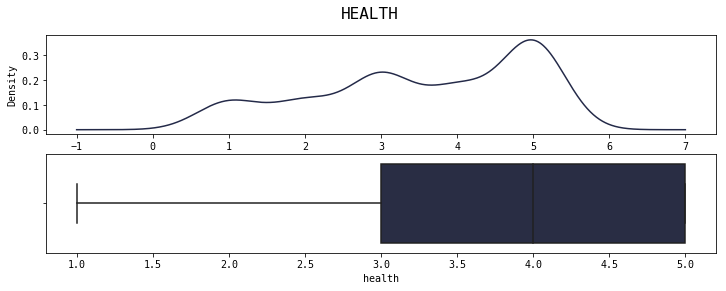

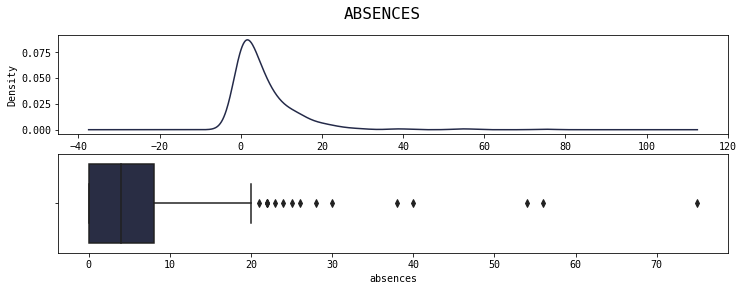

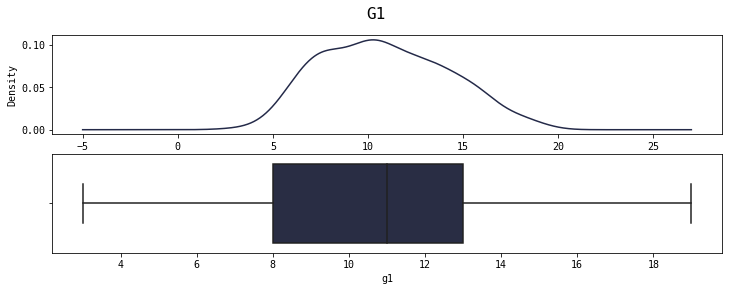

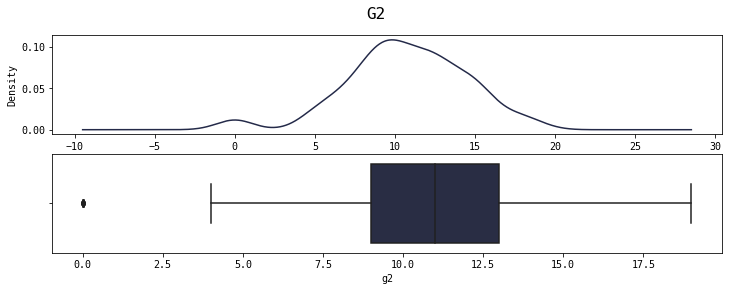

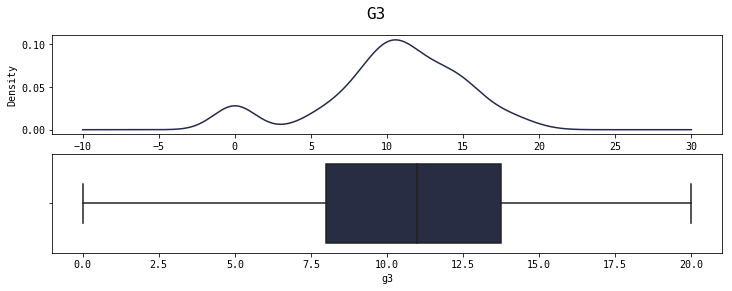

In [15]:
# KDE + Boxplot kombo
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.suptitle(col.upper(), fontsize=16)
    plt.subplot(211)
    df[col].plot(kind='kde', color=MC)
    plt.subplot(212)
    sns.boxplot(df[col], color=MC)
    plt.show()
    print()

In [16]:
categorical_cols

['school',
 'sex',
 'address',
 'familySize',
 'pStatus',
 'mJob',
 'fJob',
 'reason',
 'guardian',
 'schoolSupport',
 'familySupport',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [17]:
len(categorical_cols)

17

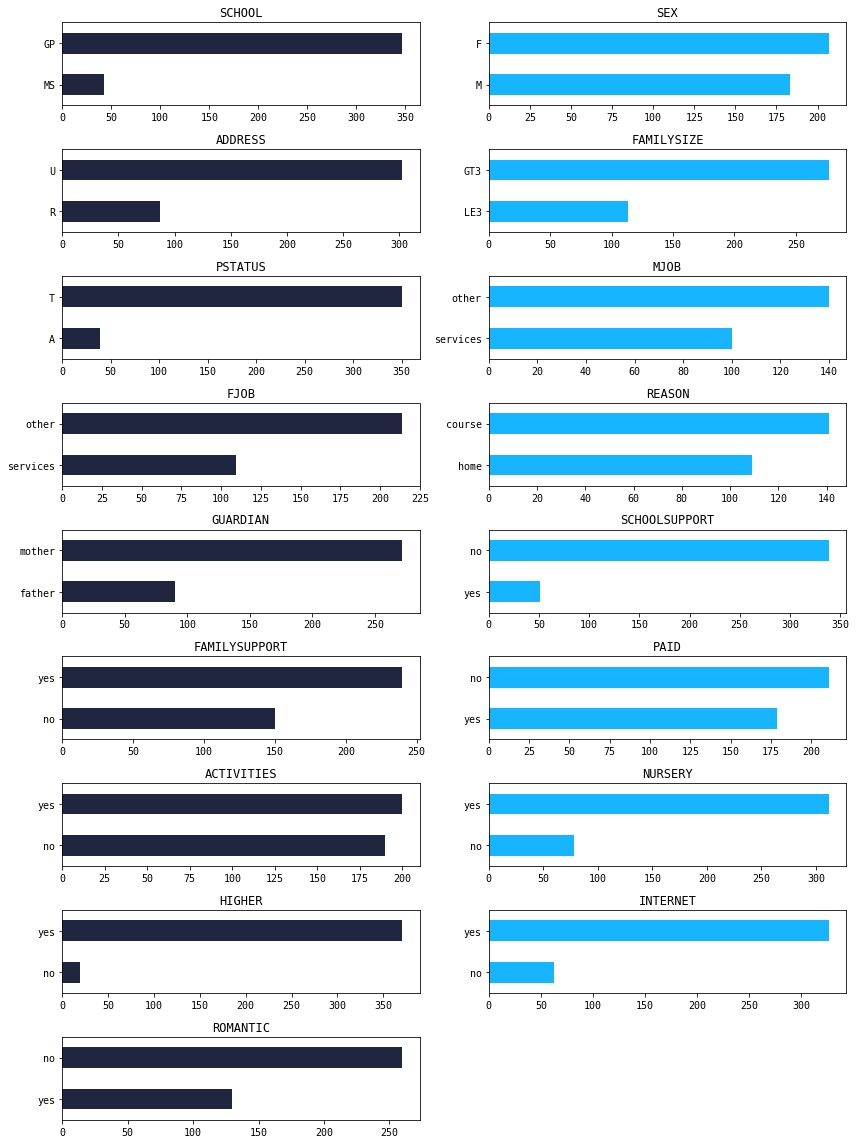

In [18]:
top_range = 2
plt.figure(figsize=(12, 16))
for i, col in enumerate(categorical_cols):
    plt.subplot(9, 2, i+1)
    df[col].value_counts()[:top_range].sort_values().plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]])
    plt.title(col.upper(), fontsize=12)
    plt.tight_layout()

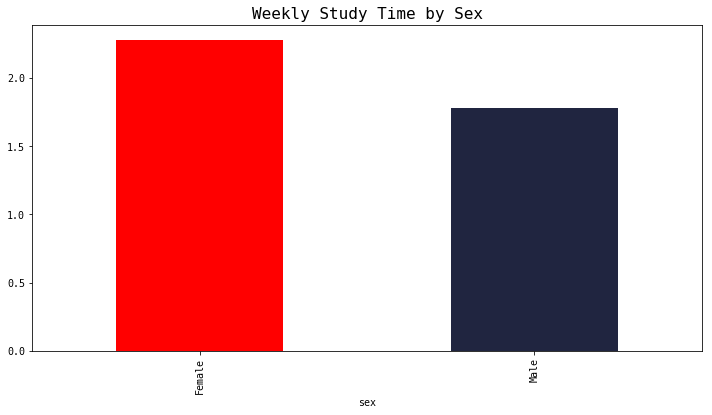

In [19]:
df.groupby('sex').studyTime.mean().plot(kind='bar', color=[colors[2], colors[0]]);
plt.title('Weekly Study Time by Sex');
plt.xticks(range(2), ['Female', 'Male']);

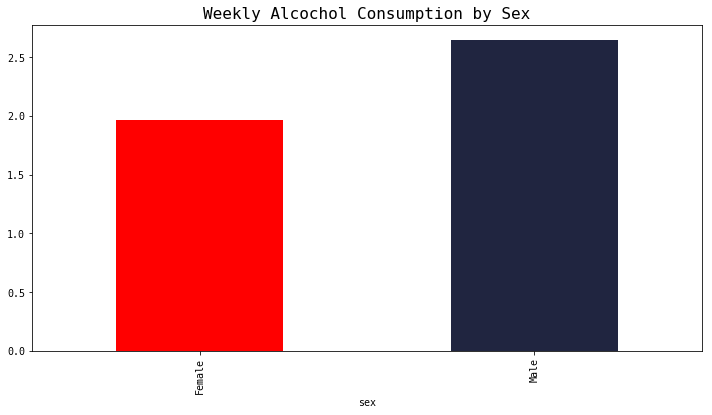

In [20]:
df.groupby('sex').wAlc.mean().plot(kind='bar', color=[colors[2], colors[0]]);
plt.title('Weekly Alcochol Consumption by Sex');
plt.xticks(range(2), ['Female', 'Male']);

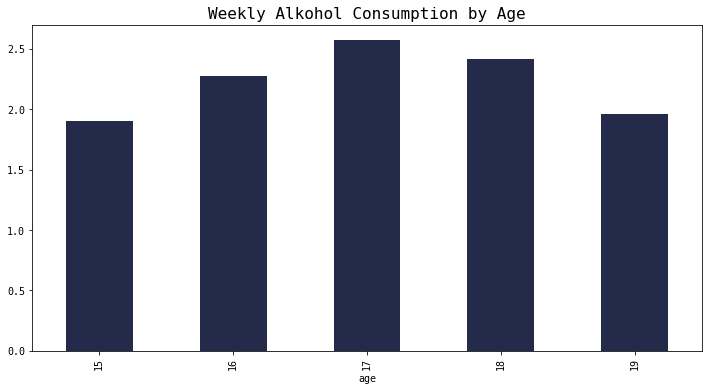

In [21]:
df.groupby('age').wAlc.mean().plot(kind='bar', color=MC)
plt.title('Weekly Alkohol Consumption by Age');

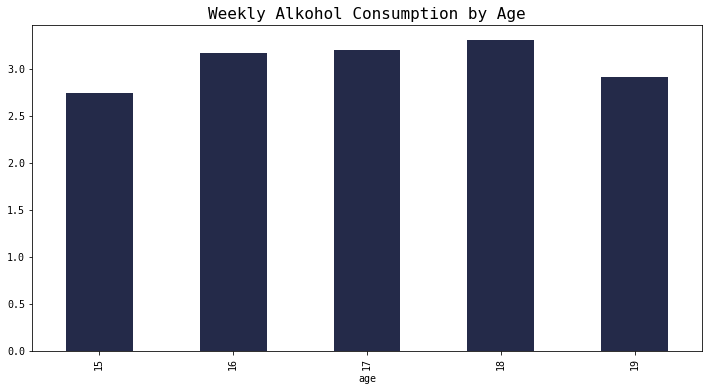

In [22]:
df.groupby('age').goOut.mean().plot(kind='bar', color=MC)
plt.title('Weekly Alkohol Consumption by Age');

In [23]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64

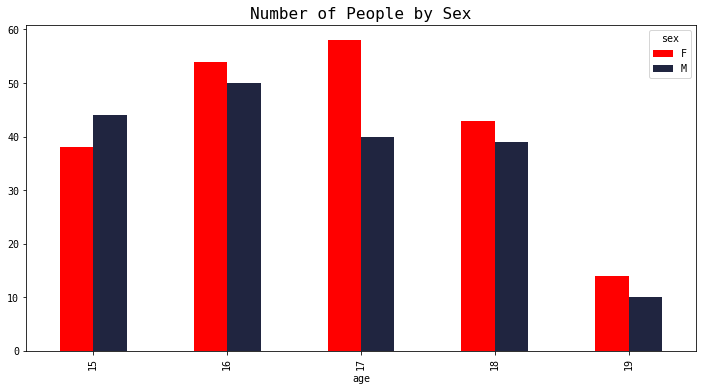

In [24]:
pd.crosstab(df.age, df.sex).plot(kind='bar', color=[colors[2], colors[0]])
plt.title('Number of People by Sex');

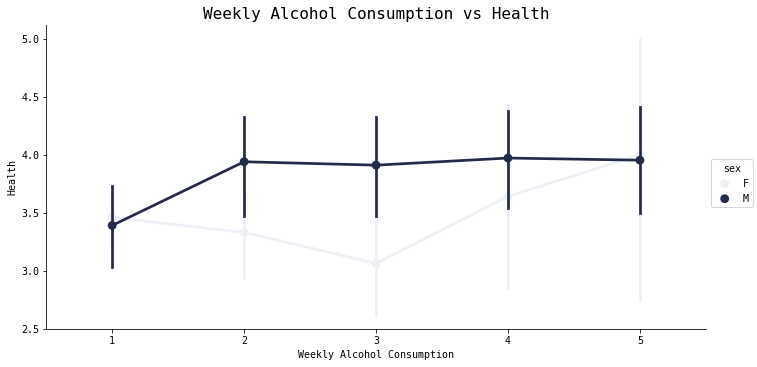

In [25]:
plot = sns.factorplot(x='wAlc', y='health', hue='sex', data=df, color=MC, size=5, aspect=2)
plot.set(xlabel='Weekly Alcohol Consumption',
         ylabel='Health',
        title='Weekly Alcohol Consumption vs Health');

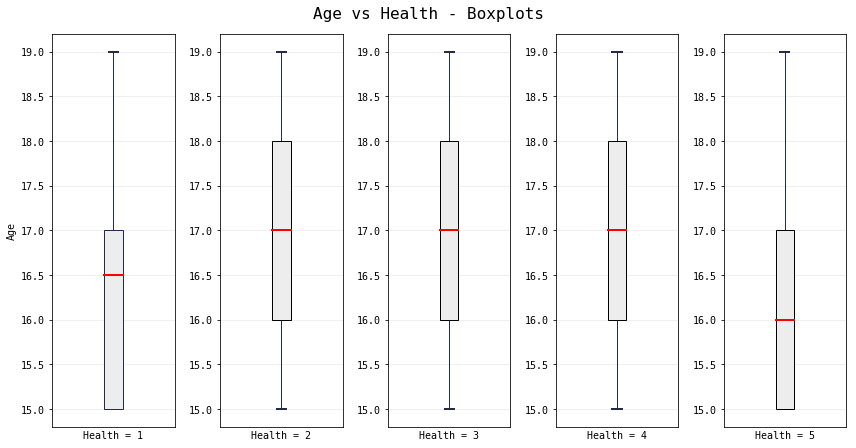

In [26]:
plt.suptitle('Age vs Health - Boxplots', y=1.03, fontsize=16)
for health in range(1, 6):
    plt.subplot(1, 5, health)
    plt.boxplot(df[df.health == health].age, **boxplot_params)
    plt.xlabel('Health = {}'.format(health))
    if health == 1:
        plt.ylabel('Age')
    plt.xticks([])
    plt.grid()
    plt.tight_layout()
plt.show()

We can achieve the same with pandas oneliner but colour management is highly messed up.

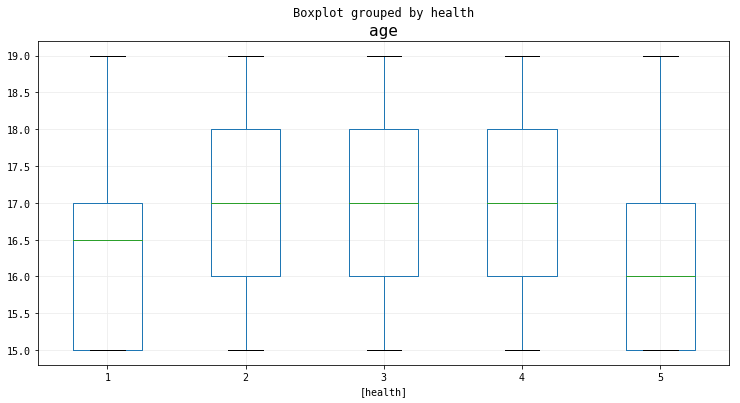

In [27]:
df[['age', 'health']].boxplot(by='health');

In [28]:
numeric_cols

Index(['age', 'mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures',
       'familyRelationship', 'freeTime', 'goOut', 'dAlc', 'wAlc', 'health',
       'absences', 'g1', 'g2', 'g3'],
      dtype='object')

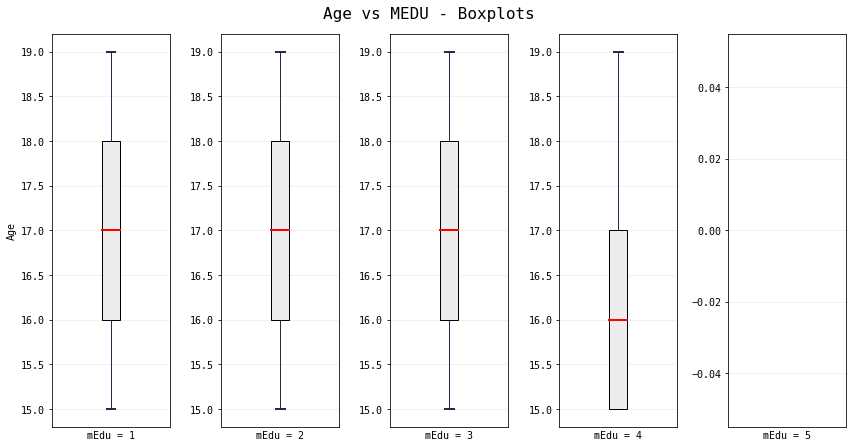

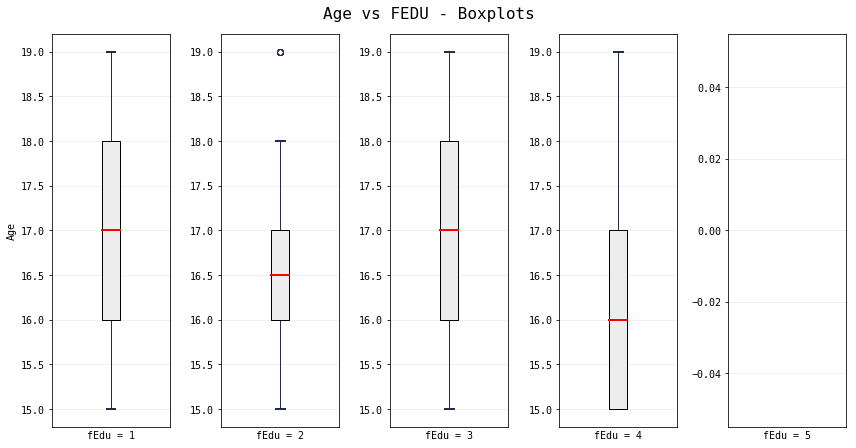

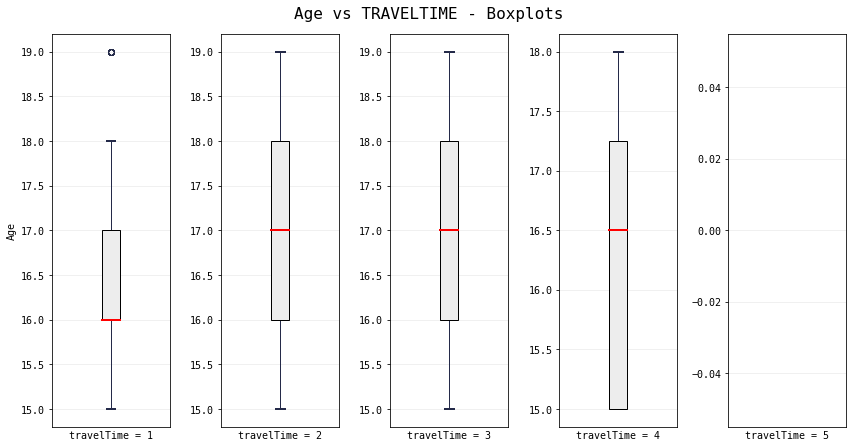

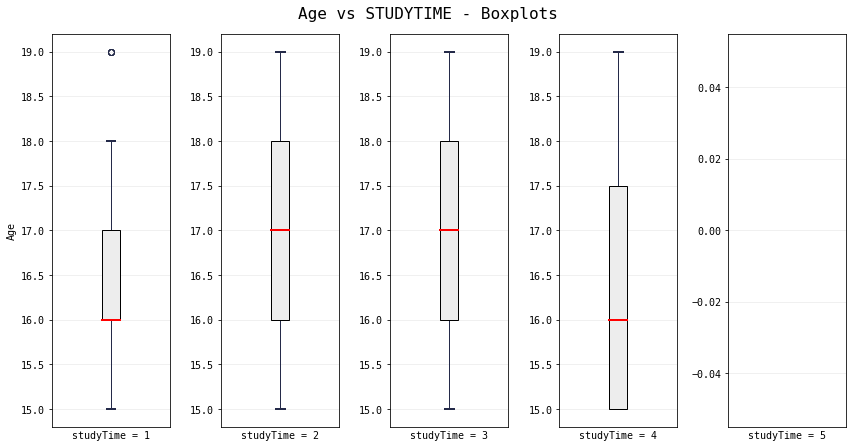

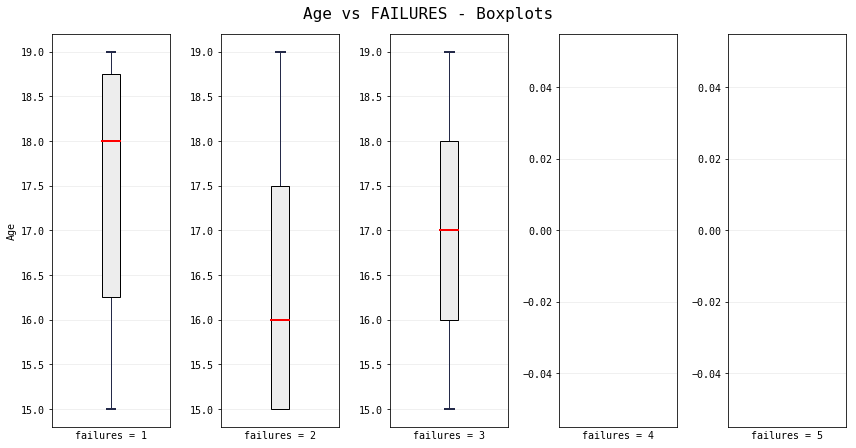

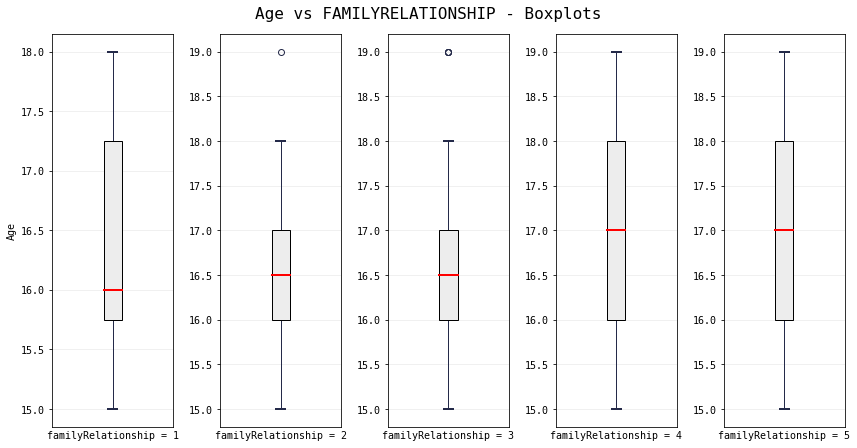

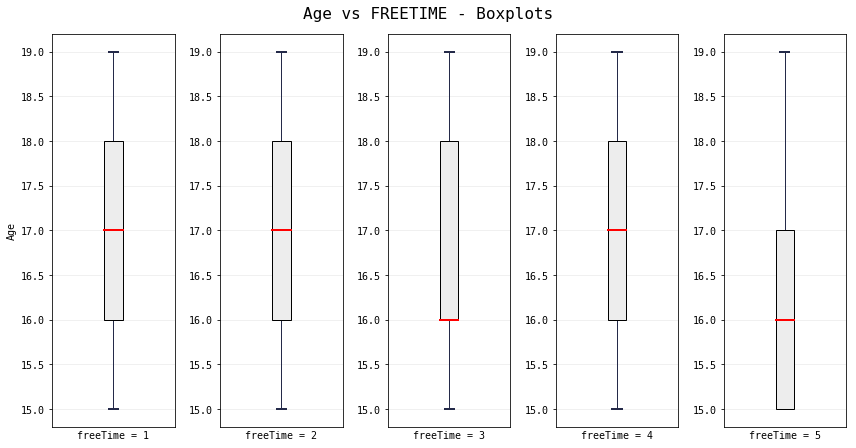

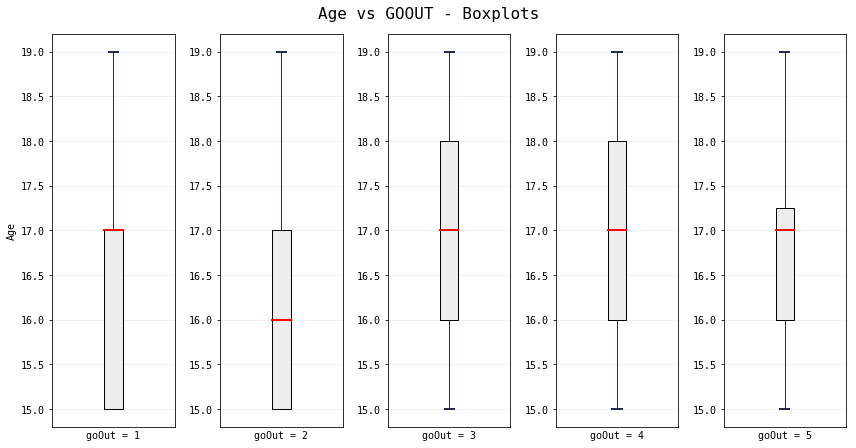

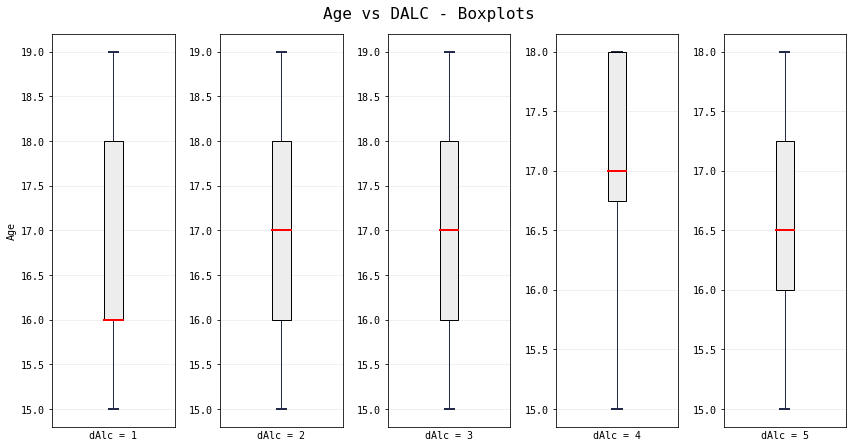

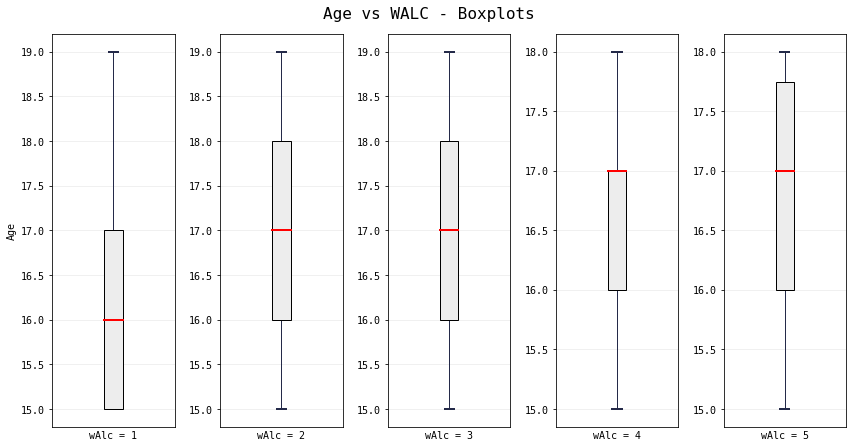

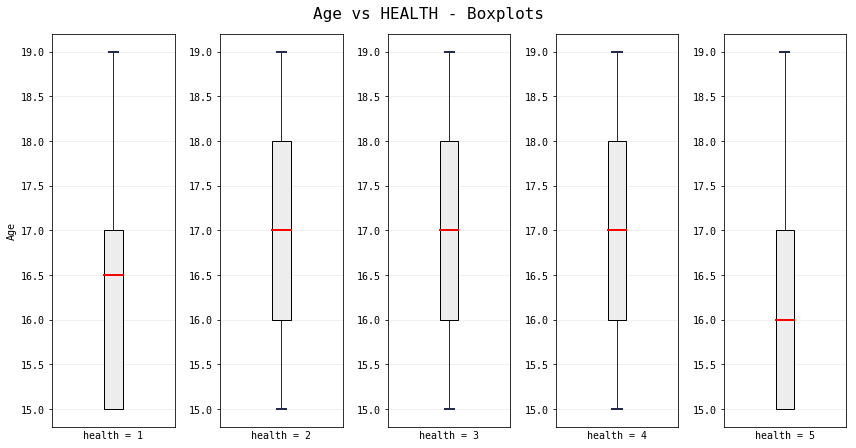

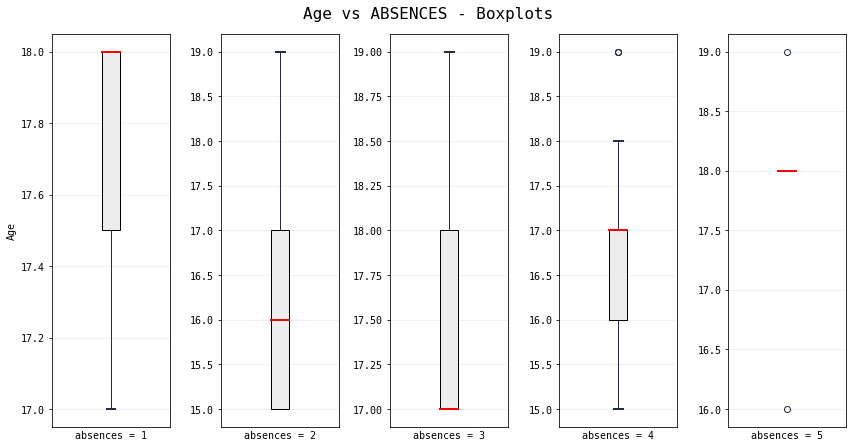

In [29]:
for col in ['mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures', 'familyRelationship',
    'freeTime', 'goOut', 'dAlc', 'wAlc', 'health', 'absences']:
    plt.suptitle('Age vs {} - Boxplots'.format(col.upper()), y=1.03, fontsize=16)
    for feature in range(1, 6):
        plt.subplot(1, 5, feature)
        plt.boxplot(df[df[col] == feature].age, **boxplot_params)
        plt.xlabel('{} = {}'.format(col, feature))
        if feature == 1:
            plt.ylabel('Age')
        plt.xticks([])
        plt.grid()
        plt.tight_layout()
    plt.show()

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


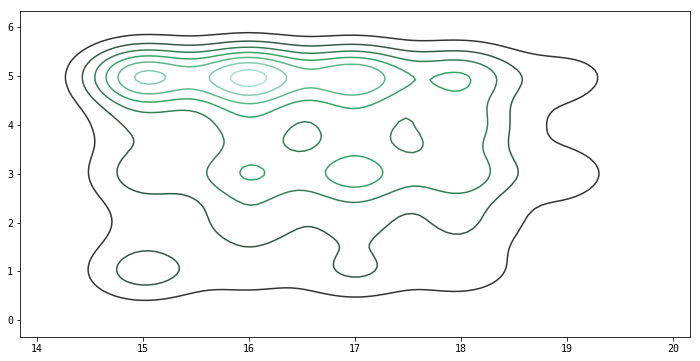

In [30]:
sns.kdeplot(df[['age', 'health']])

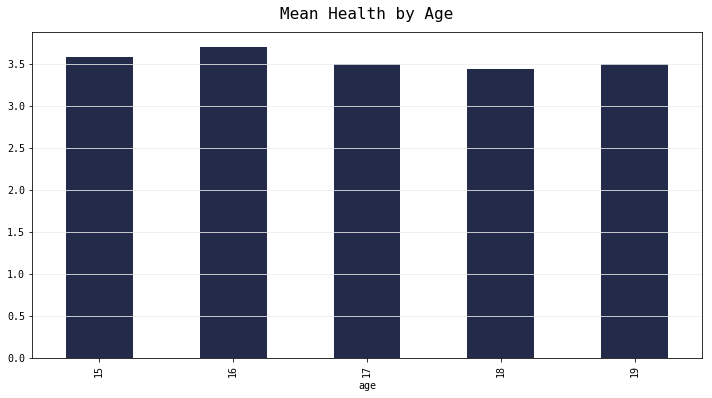

In [31]:
df.health.groupby(df.age).mean().plot(kind='bar', color=MC)
plt.grid(axis='y')
plt.title('Mean Health by Age', y=1.02);

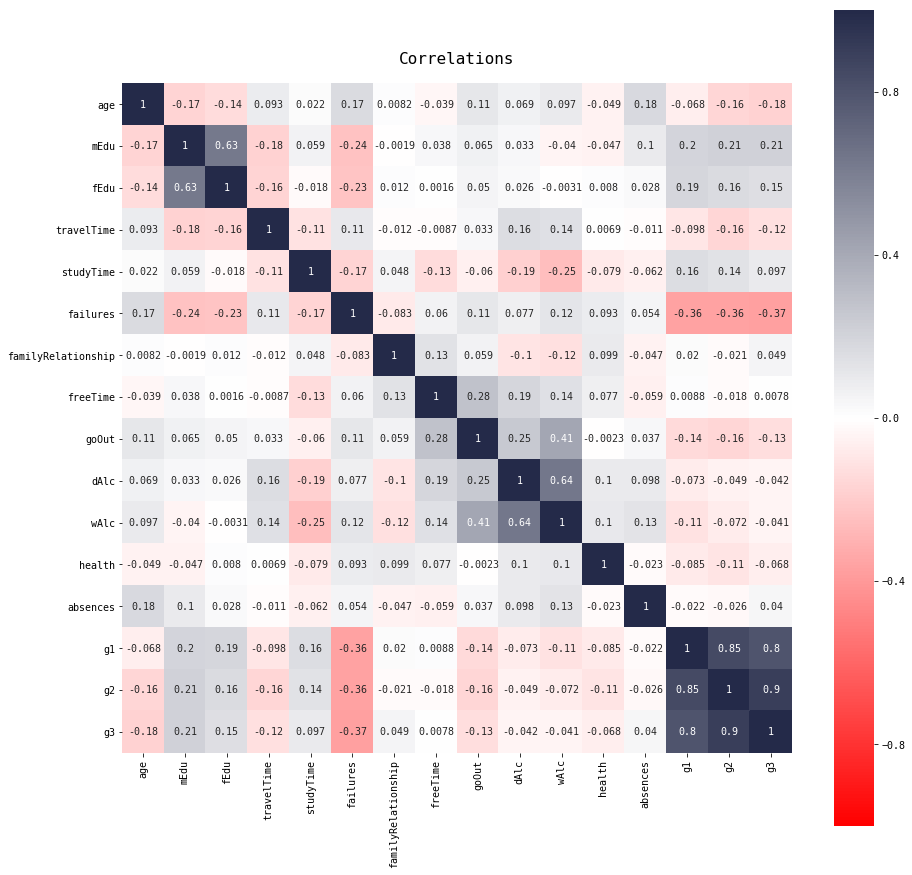

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, square=True, cmap=cmap, vmax=1, vmin=-1)
plt.title('Correlations', y=1.02);

In [33]:
df.corr().age.sort_values(ascending=False)

age                   1.00
absences              0.18
failures              0.17
goOut                 0.11
wAlc                  0.10
travelTime            0.09
dAlc                  0.07
studyTime             0.02
familyRelationship    0.01
freeTime             -0.04
health               -0.05
g1                   -0.07
fEdu                 -0.14
g2                   -0.16
mEdu                 -0.17
g3                   -0.18
Name: age, dtype: float64

In [34]:
df.corr().studyTime.sort_values(ascending=False)

studyTime             1.00
g1                    0.16
g2                    0.14
g3                    0.10
mEdu                  0.06
familyRelationship    0.05
age                   0.02
fEdu                 -0.02
goOut                -0.06
absences             -0.06
health               -0.08
travelTime           -0.11
freeTime             -0.13
failures             -0.17
dAlc                 -0.19
wAlc                 -0.25
Name: studyTime, dtype: float64

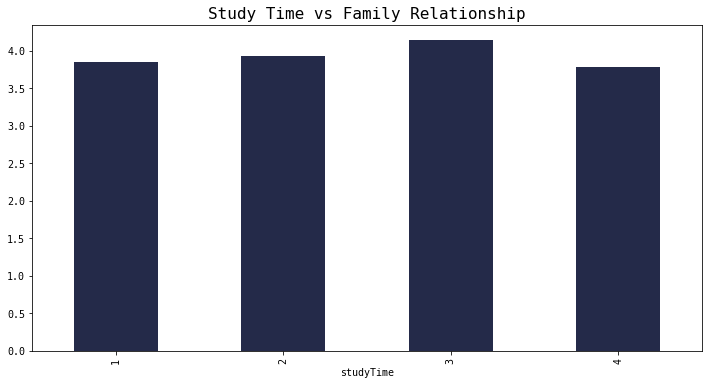

In [35]:
#  Lets inspect relation between study time and family relationship
df.familyRelationship.groupby(df.studyTime).mean().plot(kind='bar', color=MC)
plt.title('Study Time vs Family Relationship');

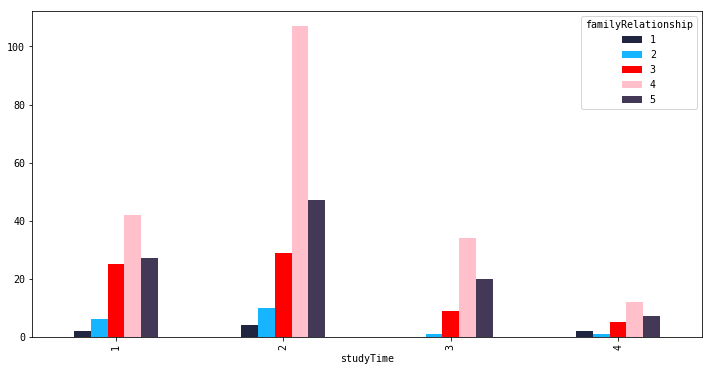

In [36]:
pd.crosstab(df.studyTime, df.familyRelationship).plot(kind='bar', color=colors)

In [37]:
df.corr().familyRelationship.sort_values(ascending=False)

familyRelationship    1.00
freeTime              0.13
health                0.10
goOut                 0.06
g3                    0.05
studyTime             0.05
g1                    0.02
fEdu                  0.01
age                   0.01
mEdu                 -0.00
travelTime           -0.01
g2                   -0.02
absences             -0.05
failures             -0.08
dAlc                 -0.10
wAlc                 -0.12
Name: familyRelationship, dtype: float64

Alcohol have negative impact on family relations and free time and health positive.

In [38]:
df.corr().familyRelationship.agg(abs).sort_values(ascending=False)[1:6]

freeTime   0.13
wAlc       0.12
dAlc       0.10
health     0.10
failures   0.08
Name: familyRelationship, dtype: float64

In [39]:
df.dAlc.value_counts()

1    274
2     75
3     25
5      8
4      8
Name: dAlc, dtype: int64

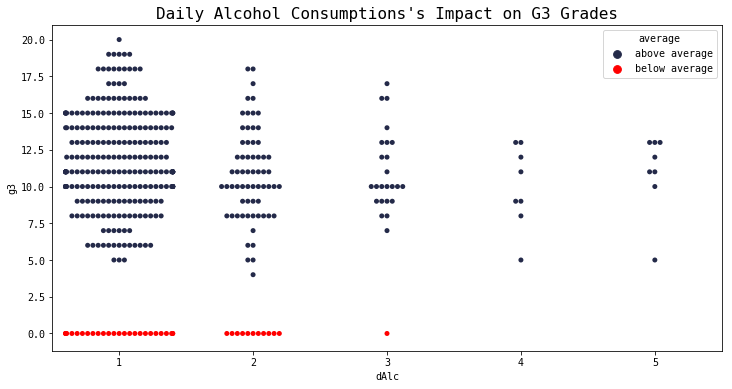

In [40]:
average = df.dAlc.mean()
df['average'] = ['above average' if i > average else 'below average' for i in df.g3]
sns.swarmplot(x='dAlc', y='g3', hue='average', data=df, palette={'above average': MC, 'below average': 'red'})
plt.title("Daily Alcohol Consumptions's Impact on G3 Grades");

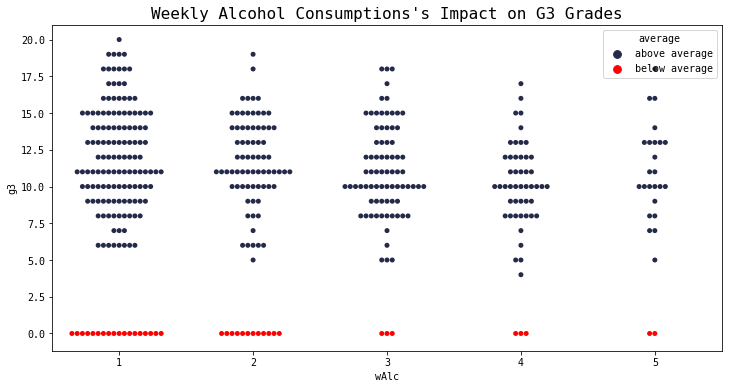

In [41]:
average = df.dAlc.mean()
df['average'] = ['above average' if i > average else 'below average' for i in df.g3]
sns.swarmplot(x='wAlc', y='g3', hue='average', data=df, palette={'above average': MC, 'below average': 'red'})
plt.title("Weekly Alcohol Consumptions's Impact on G3 Grades");

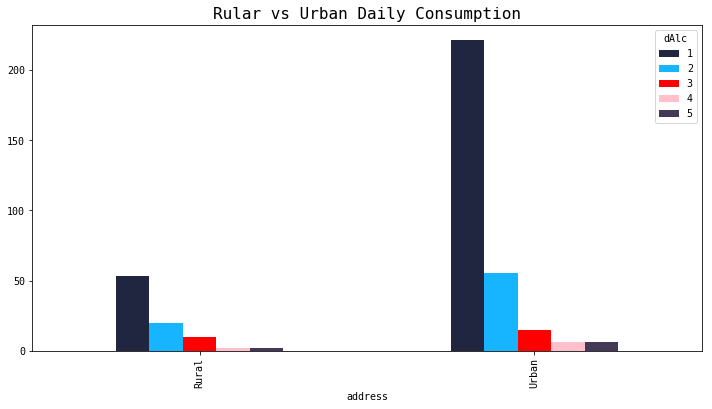

In [42]:
pd.crosstab(df.address, df.dAlc).plot(kind='bar', color=colors);
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.title('Rular vs Urban Daily Consumption');

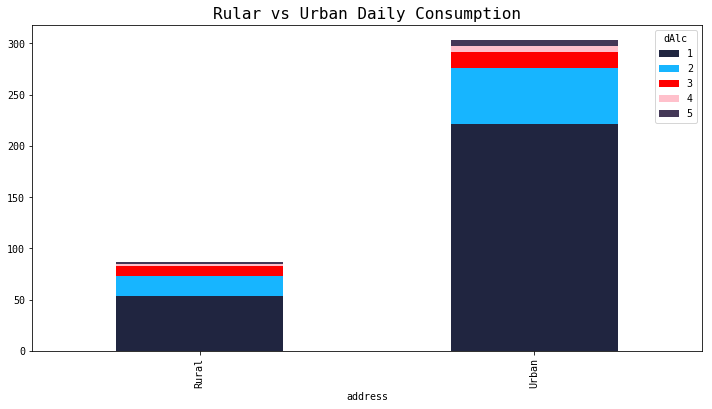

In [43]:
pd.crosstab(df.address, df.dAlc).plot.bar(stacked=True, color=colors)
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.title('Rular vs Urban Daily Consumption');

# Machine Learning Part

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
df['averageGrade'] = (df.g1 + df.g2 + df.g3) / 3

In [46]:
df.averageGrade.head()

0    5.67
1    5.33
2    8.33
3   14.67
4    8.67
Name: averageGrade, dtype: float64

In [47]:
# y = df.averageGrade.values
X = df[numeric_cols].drop(['g1', 'g2', 'g3', 'age'], axis=1)
y = df.g1
# X.head(1)

In [48]:
models = {
    'Random Forest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elastic Net': ElasticNet(),
}

In [49]:
for model in models:
    scores = cross_val_score(models[model], X, y, cv=5)
    print('{:<18} {}'.format(model, scores.mean()))

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Random Forest      -0.07796301837497929
LinearRegression   0.07393165631475751
Lasso              -0.030802869415998923
Ridge              0.07430108163580211
Elastic Net        0.010747629336204056


Negative score:

R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

In [50]:
model = DecisionTreeRegressor()
model.fit(X, y)
importances = model.feature_importances_
importances_idx = np.argsort(model.feature_importances_)[::-1]
X.columns[importances_idx[0]]
for idx in importances_idx:
    print('{:<20}{}'.format(X.columns[idx], importances[idx]))

absences            0.16344715657902978
freeTime            0.13454581089346307
failures            0.12928003928915738
familyRelationship  0.09657436476582616
health              0.09611660211985947
goOut               0.084335654282538
fEdu                0.057734712942273385
studyTime           0.05708121790977275
travelTime          0.05378329456846661
wAlc                0.04495824499584266
dAlc                0.043901109182534793
mEdu                0.038241792471235984


Looks like we have to little examples for machine learning to be effective - no predictive power in the features.

Lets try using all of the variables by converting categorical features into numerical.

In [51]:
X_dummy = df.drop(['g1', 'g2', 'g3', 'age', 'averageGrade'], axis=1)
X_dummy = pd.get_dummies(X_dummy)

In [52]:
for model in models:
    scores = cross_val_score(models[model], X_dummy, y, cv=5)
    print('{:<18} {}'.format(model, scores.mean()))

Random Forest      0.054620150160707495
LinearRegression   0.19936511407748897
Lasso              -0.030802869415998923
Ridge              0.2035678054009013
Elastic Net        0.010747629336204056


In [53]:
model = DecisionTreeRegressor()
model.fit(X_dummy, y)
importances = model.feature_importances_
importances_idx = np.argsort(model.feature_importances_)[::-1]
X_dummy.columns[importances_idx[0]]
for idx in importances_idx[:10]:  # Top 10
    print('{:<24}{}'.format(X_dummy.columns[idx], importances[idx]))

average_below average   0.11270373468241279
schoolSupport_no        0.063088791682512
failures                0.0570172523920992
absences                0.05591151561063658
wAlc                    0.05231984390040952
freeTime                0.049053843916878115
fEdu                    0.047822813555003986
fJob_teacher            0.04543427413631878
studyTime               0.04164357632215063
health                  0.03684762439947101


In [54]:
scores_table = []
for n_components in range(2, len(X_dummy.columns)):
    model = LinearRegression()
    scores = cross_val_score(model, PCA(n_components).fit_transform(X_dummy), y, cv=5)
    print('{:5<}: {:.6f}'.format(n_components, scores.mean()))
    scores_table.append(scores.mean())

2: -0.013830
3: 0.029558
4: 0.026728
5: 0.020645
6: 0.013576
7: 0.035602
8: 0.018496
9: 0.016516
10: 0.019759
11: 0.050033
12: 0.055763
13: 0.077757
14: 0.080756
15: 0.080052
16: 0.073034
17: 0.081336
18: 0.102059
19: 0.096551
20: 0.090971
21: 0.088836
22: 0.100838
23: 0.105131
24: 0.122382
25: 0.123051
26: 0.129987
27: 0.125038
28: 0.116285
29: 0.109894
30: -0.031105
31: 0.052651
32: 0.141628
33: -4.246869
34: -4.439997
35: -3.352171
36: -2.511773
37: -2.507363
38: -5.878636
39: 0.199365
40: -18126835529063981907968.000000
41: -17157512346970942865408.000000
42: -12575410567216229253120.000000
43: -18088101019619606659072.000000
44: -19740859155367107493888.000000
45: -14786453368355478831104.000000
46: -15772367963455001460736.000000
47: -15730117688256052068352.000000
48: -15668474670230917873664.000000
49: -16007652577869159202816.000000
50: -15949076150233449103360.000000
51: -16064994823303973568512.000000
52: -16201659475087436283904.000000
53: -16188998870408112373760.000000
54

No gain with PCA

In [55]:
print('Max score with PCA:', max(scores_table))

Max score with PCA: 0.199365114077


##### Lets try to predict romantic relationship 

In [56]:
y_rom = df.romantic.replace({'yes': 1, 'no': 0})
X_rom = df.drop('romantic', 1)
X_rom_dummy = pd.get_dummies(X_rom)

model = BernoulliNB()
scores = cross_val_score(model, X_rom_dummy, y_rom, cv=5)
scores.mean()

0.63076923076923075

In [57]:
model = XGBClassifier()
scores = cross_val_score(model, X_rom_dummy, y_rom, cv=5)
scores.mean()

0.60256410256410253

In [ ]:
import autosklearn.classification
model = autosklearn.classification.AutoSklearnClassifier()
scores = cross_val_score(model, X_dummy, y, cv=5)

[WARNING] [2017-12-19 02:59:50,761:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 02:59:50,761:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:17:57,735:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:17:57,735:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:18:07,246:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:18:07,246:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:18:33,646:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:23:16,662:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:23,066:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:23,066:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:32,720:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:32,720:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:37,672:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:23:37,672:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:26:59,665:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:26:59,665:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:27:06,614:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:27:06,614:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:27:20,731:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:27:20,731:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:27:28,313:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:31:15,746:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:21,597:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:21,597:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:29,727:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:29,727:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:39,532:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:31:39,532:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:36:40,488:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:36:40,488:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:36:54,932:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:36:54,932:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:42:08,854:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:42:08,854:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:42:23,233:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:48:04,476:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:14,479:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:14,479:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:48,441:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:48,441:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:53,369:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:48:53,369:smac.intensification.intensificatio

[WARNING] [2017-12-19 03:59:01,305:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:59:01,305:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:59:31,453:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:59:31,453:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:59:46,363:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 03:59:46,363:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-12-19 04:03:51,496:smac.intensification.intensificatio

In [ ]:
scores